# Uber Taxi Fare Prediction

## Introduction
In this workbook I will be conducting regression analysis on a dataset of Uber trips in New York to predict the fares of potential trips. The dataset is available [here](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset). It is a subset of a larger dataset provided as a dataset for a competition which is available [here](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data).

My goal is to train a machine learning model that can accurately predict the fare of an Uber taxi ride given relevant information such as the pickup and drop-off longitude and latitude, time of day, and distance traveled. To do this, we will use regression techniques to build a model that can make continuous predictions.

In this project, I will try to cover the following steps:

* Data preparation, cleaning and exploratory data analysis
* Model selection and training
* Model evaluation and improvement

By the end of this project, I hope to have a predictive model that can be used to estimate Uber fares with high accuracy.

### Imports

In [145]:
#import the necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
import math

### Acquire Data
The Python Pandas packages helps us work with our datasets. We start by reading the dataset as a dataframe. 

In [146]:
#import the dataset
uber_df = pd.read_csv("./uber.csv")

In [147]:
#look at the columns of the dataframe
print(f'The columns in this dataframe are: {uber_df.columns.values}')

The columns in this dataframe are: ['Unnamed: 0' 'key' 'fare_amount' 'pickup_datetime' 'pickup_longitude'
 'pickup_latitude' 'dropoff_longitude' 'dropoff_latitude'
 'passenger_count']


In [148]:
#preview the data
uber_df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [149]:
uber_df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [150]:
#Check number of samples in dataset
print(f'Dataset consists of {uber_df.shape[0]} samples')
uber_df.shape

Dataset consists of 200000 samples


(200000, 9)

In [151]:
#Check if there are any null values in the df
uber_df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [152]:
#Check the row/rows with null values for the dropoff longitude and latitude
uber_df[uber_df.isna().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [153]:
#Drop null value
uber_df.dropna(inplace=True)

In [154]:
uber_df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [155]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [156]:
#check shape of dataframe after dropping value
uber_df.shape

(199999, 9)

From the preview, we can see that there are 8 numerical variables and 1 categorical variable.

The features are:
* Unnamed:0 - Not sure what it represents
* key - Unique identifier with the pickup_datetime and string attached to the end of it
* pickup_datetime - timestamp when trip started
* pickup_longitude - value that represents the longitude at which the passenger was picked up
* pickup_latitude - value that represents the latitude at which the passenger was picked up
* dropoff_longitude - value that represents the longitude at which the passenger was dropped off
* dropoff_latitude - value that represents the latitude at which the passenger was dropped off
* passenger_count - number of passengers that were in the uber

The target is:
* fare_amount - Dollar amount cost of the trip

We will also look to remove the duplicates in the dataframe if they are present

In [157]:
#drop duplicates if present
prev_size = uber_df.shape
uber_df.drop_duplicates()
print(f'Found {prev_size[0] - uber_df.shape[0]} duplicates')

Found 0 duplicates


Values for the longitudes range from [-180, 180] and the values for the latitudes range from [-90, 90]. We will remove the rows that have values outside of these ranges

In [158]:
#only select valid longitudes and latitudes
rev_size = uber_df.shape
uber_df = uber_df[(uber_df.pickup_longitude >= -180) & (uber_df.pickup_longitude <= 180) &
                 (uber_df.pickup_latitude >= -90) & (uber_df.pickup_latitude <= 90) &
                 (uber_df.dropoff_longitude >= -180) & (uber_df.dropoff_longitude <= 180) &
                 (uber_df.dropoff_latitude >= -90) & (uber_df.dropoff_latitude <= 90)]
print(f'Removed {prev_size[0] - uber_df.shape[0]} samples with invalid coordinates')
uber_df.shape

Removed 12 samples with invalid coordinates


(199987, 9)

In [159]:
uber_df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999870e+05,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000,199987.000000
mean,2.771284e+07,11.359849,-72.501786,39.917937,-72.511608,39.922031,1.684544
std,1.601384e+07,9.901868,10.449955,6.130412,10.412192,6.117669,1.385999
min,1.000000e+00,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,1.382554e+07,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000
50%,2.774626e+07,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000
75%,4.155554e+07,12.500000,-73.967154,40.767157,-73.963658,40.768000,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000


In [160]:
uber_df['pickup_datetime'].dtype

dtype('O')

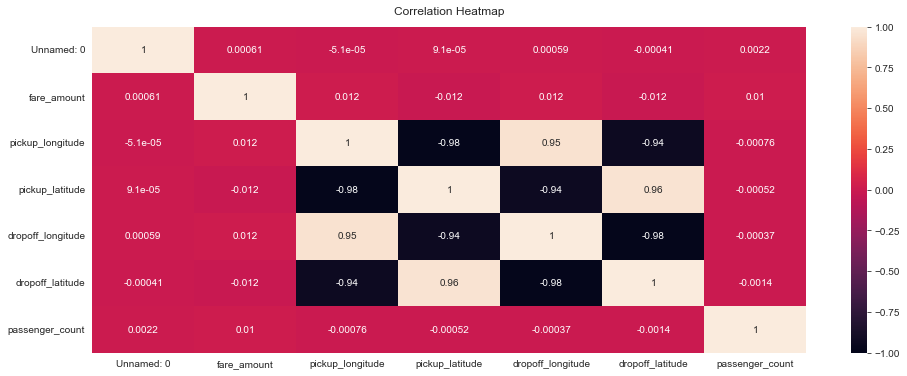

In [161]:
#Check the correlation between the values 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(uber_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The type of the 'pickup_datetime' column is of type object. To further examine the effect the time has on the fare_amount, we want to convert it so that we can extract the year, month, day and hour

In [162]:
#convert to datetime to extract month, year etc.
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])

In [163]:
#Check the new type of pickup_datetime column
uber_df['pickup_datetime'].dtype

datetime64[ns, UTC]

We can now extract the specific values for year, month, day and hour of the pickup

In [164]:
#create columns for year, month, day, time
uber_df['year'] = uber_df['pickup_datetime'].dt.year
uber_df['month'] = uber_df['pickup_datetime'].dt.month
uber_df['day'] = uber_df['pickup_datetime'].dt.weekday
uber_df['hour'] = uber_df['pickup_datetime'].dt.hour

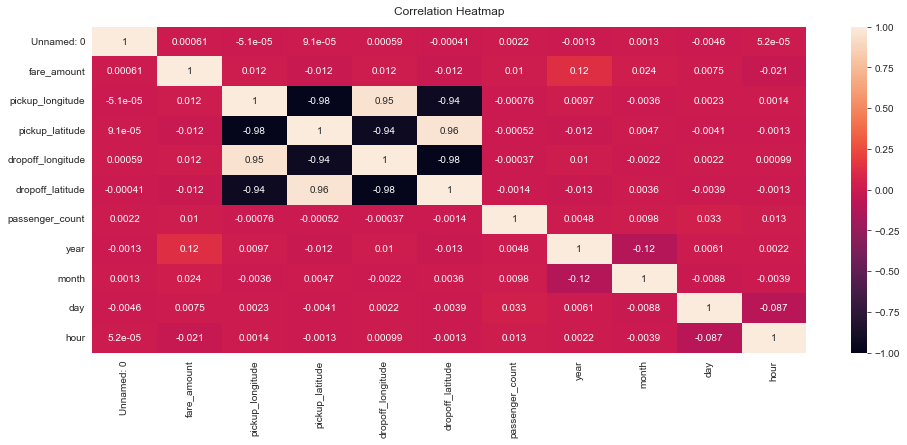

In [165]:
#Check the correlation between the values 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(uber_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We can see from the dataframes and heatmap above that there is no correlation between the column Unnamed: 0 and any other column. We can drop this column as it seems to be a random set of numbers.

In [166]:
#drop Unnamed: 0
uber_df.drop('Unnamed: 0', axis=1, inplace=True)

Since the 'key' column is also just a repitition of the 'pickup_datetime' with a string concatenated at the end, we can also drop that

In [167]:
#drop key column
uber_df.drop('key', axis = 1, inplace=True)

Since we have the values for the year, month, day and hour, we can drop pickup_datetime column since we have all the information we need in different columns

In [168]:
#drop pickup_datetime
uber_df.drop('pickup_datetime', axis = 1, inplace=True)

In [169]:
uber_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14


### Adding new distance column

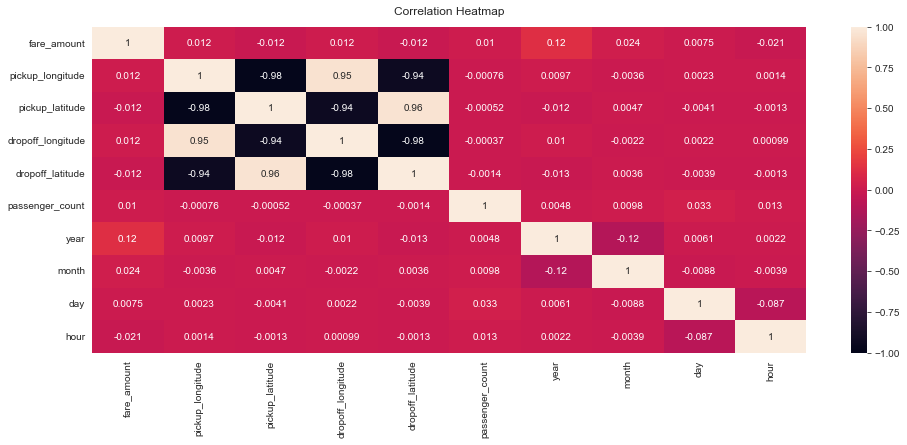

In [170]:
#Check the correlation between the values 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(uber_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

After looking at the other features in the dataframe, we see that we do not have a strong correlation with the target (fare_amount). Uber bases its fare_amount on the distance and since we cannot see a huge correlation between the coordinates and the price, so I will try to convert it to a single variable - Distance. I believe there isn't a lot of correlation between the coordinates and the fare_amount because the values of the coordinates differ very slightly and could be difficult to measure

To calculate the distance between two points given their longitudes and latitudes, I'm going to use the Haversine formula, which is a mathematical formula that gives the great-circle distance between two points on the surface of a sphere, such as the Earth. The formula takes into account the curvature of the Earth and provides a more accurate result than simple Euclidean distance calculations. I'm implementing the formula from [here](https://en.wikipedia.org/wiki/Haversine_formula).

In [171]:
def distance(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude to spherical coordinates in radians.
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Compute the Haversine formula.
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of Earth in kilometers.
    return c * r

In [172]:
uber_df['Distance'] = uber_df.apply(lambda x: distance(x['pickup_longitude'], x['pickup_latitude'],
                              x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

Also adding new columns for the absolute differences between the longitude values and also the latitude values. I did this to see if there was any adddition information that could be found relating to the fare_amount

In [173]:
#Calculate absolute difference between dropoff coordinates and pickup coordinates
uber_df['abs_long'] = abs(uber_df['pickup_longitude'] - uber_df['dropoff_longitude'])
uber_df['abs_lat'] = abs(uber_df['pickup_latitude'] - uber_df['dropoff_latitude'])

In [174]:
#look at uber_df
uber_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,Distance,abs_long,abs_lat
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323,0.000305,0.015137
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590,0.000355,0.022100
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377,0.042478,0.031877
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683,0.010808,0.012505
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450,0.048059,0.017162


## Visualize the features

I'm now going to visualize the features in the dataset. Visualizing the features is a crucial step in the exploratory data analysis (EDA) process. By visualizing the features, I can gain insights into the underlying patterns, relationships, and distributions of the variables.

I'm going to visualize the features by looking at their boxplots and distributions. I can then remove outliers by using the interquartile range (IQR), and the first and third quartiles to measure the upper and lower threshold. I'm going to initially consider the data points outside of the range as outliers and remove them

Outliers are data points that are significantly different from the rest of the data and can negatively impact the performance of your machine learning model. For example, outliers can lead to overfitting or biased results if they are not properly handled. Therefore, it is important to identify and remove outliers from your dataset before building a machine learning model.

### Analyze pickup_longitude

(-74.5, -73.5)

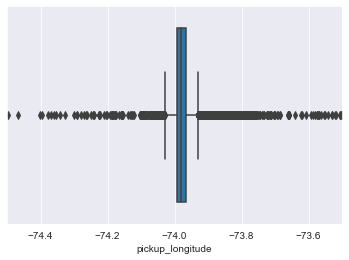

In [175]:
#visualize pickup_longitude
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['pickup_longitude'], orient='h')
plt.xlim(-74.5, -73.5)

In [176]:
#calculate different statistics
median = np.median(uber_df['pickup_longitude'])
std = np.std(uber_df['pickup_longitude'])
mean = np.mean(uber_df['pickup_longitude'])
Q1 = uber_df['pickup_longitude'].quantile(0.25)
Q3 = uber_df['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is -73.992064
The third quartile value is -73.96715400000001
The interquartile range is 0.024909999999991328
The lower thresold is -74.029429
The upper thresold is -73.92978900000003


<AxesSubplot:xlabel='pickup_longitude', ylabel='Count'>

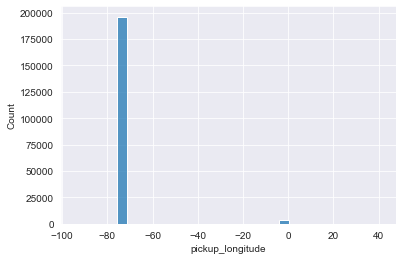

In [177]:
# check the distribution of the "pickup_longitude"
sns.histplot(data=uber_df, x="pickup_longitude", bins = 30)

We can see a small spike near 0 that is definitely an outlier

I used the coordinates for a bounding box from this [website](https://www.openstreetmap.org/export#map=8/52.154/5.295) to restrict it to New York City to better identify the trips that actually took place in the city. I drop any of the coordinates that are outside this range

After looking at the boxplot and the the distribution, our main goal is to remove the values near 0. However, we should also remove the values that have values in the suburbs of New York as that might affect the fare.

In [178]:
#Remove outliers
old_shape = uber_df.shape
#Use the min, max values for longitude
uber_df.drop(uber_df[(uber_df['pickup_longitude'] < -74.15) | (uber_df['pickup_longitude'] > -73.5)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')
      

Number of samples before removing outliers: 199987
Number of samples after removing outliers: 195891


<AxesSubplot:xlabel='pickup_longitude', ylabel='Count'>

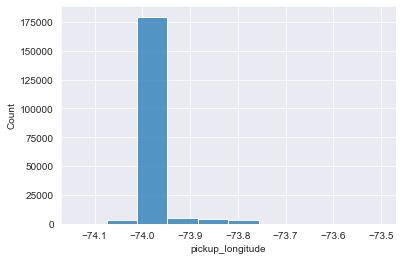

In [179]:
#Look at new distribution
sns.histplot(data=uber_df, x="pickup_longitude", bins = 10)

The distrubiton of values is more centered and the outliers near 0 have been removed

### Analyze pickup_latitude

(40.0, 41.3)

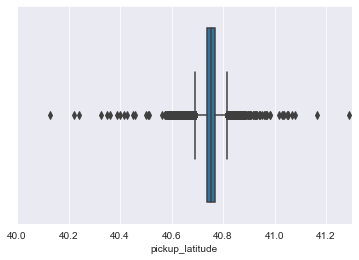

In [180]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['pickup_latitude'], orient='h')
plt.xlim(40, 41.3)

In [181]:
median = np.median(uber_df['pickup_latitude'])
std = np.std(uber_df['pickup_latitude'])
mean = np.mean(uber_df['pickup_latitude'])
Q1 = uber_df['pickup_latitude'].quantile(0.25)
Q3 = uber_df['pickup_latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 40.736455
The third quartile value is 40.767521
The interquartile range is 0.031066000000002703
The lower thresold is 40.68985599999999
The upper thresold is 40.81412


(40.0, 43.0)

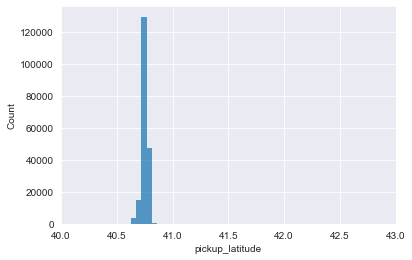

In [182]:
sns.histplot(data=uber_df, x="pickup_latitude", bins = 1000)
plt.xlim(40, 43)

We conduct a similar analysis for this variable as well and remove the coordinates that are near the suburbs

In [183]:
old_shape = uber_df.shape
#use maximum and minimum values for the latitudes in New York City
uber_df.drop(uber_df[(uber_df['pickup_latitude'] < 40.7) | (uber_df['pickup_latitude'] > 41)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')

Number of samples before removing outliers: 195891
Number of samples after removing outliers: 190015


<AxesSubplot:xlabel='pickup_latitude', ylabel='Count'>

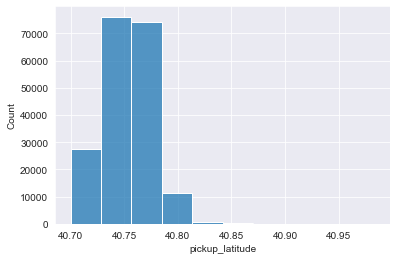

In [184]:
#Look at new distrubiton
sns.histplot(data=uber_df, x="pickup_latitude", bins = 10)

Distribution is more normal

### Analyze dropoff_longitude

Repeat the process for this variable as well

(-74.2, -73.7)

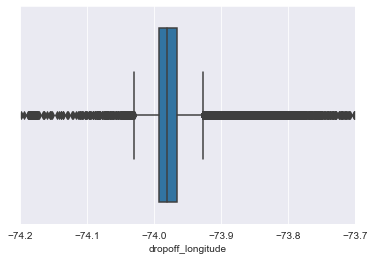

In [185]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['dropoff_longitude'], orient='h')
plt.xlim(-74.2, -73.7)

In [186]:
median = np.median(uber_df['dropoff_longitude'])
std = np.std(uber_df['dropoff_longitude'])
mean = np.mean(uber_df['dropoff_longitude'])
Q1 = uber_df['dropoff_longitude'].quantile(0.25)
Q3 = uber_df['dropoff_longitude'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is -73.9916065
The third quartile value is -73.965889
The interquartile range is 0.02571749999999895
The lower thresold is -74.03018275
The upper thresold is -73.92731275


(-74.4, -73.6)

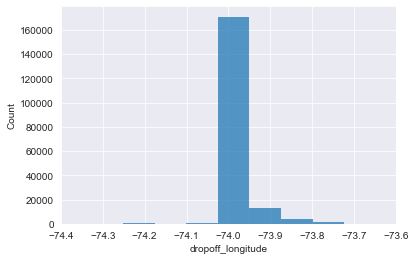

In [187]:
sns.histplot(data=uber_df, x="dropoff_longitude", bins = 1000)
plt.xlim(-74.4, -73.6)

In [188]:
old_shape = uber_df.shape
uber_df.drop(uber_df[(uber_df['dropoff_longitude'] < -74.15) | (uber_df['dropoff_longitude'] > -73.5)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')

Number of samples before removing outliers: 190015
Number of samples after removing outliers: 189540


(-74.4, -73.6)

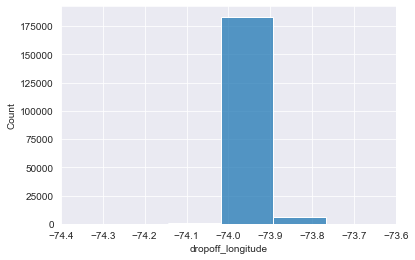

In [189]:
sns.histplot(data=uber_df, x="dropoff_longitude", bins = 5)
plt.xlim(-74.4, -73.6)

### Analyze dropoff_latitude

(40.5, 41.6)

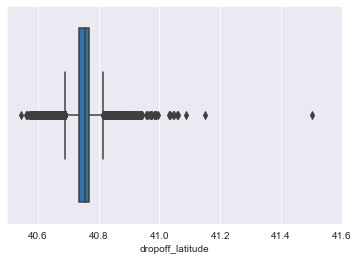

In [190]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['dropoff_latitude'], orient='h')
plt.xlim(40.5, 41.6)

In [191]:
median = np.median(uber_df['dropoff_latitude'])
std = np.std(uber_df['dropoff_latitude'])
mean = np.mean(uber_df['dropoff_latitude'])
Q1 = uber_df['dropoff_latitude'].quantile(0.25)
Q3 = uber_df['dropoff_latitude'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 40.736725
The third quartile value is 40.7685776817627
The interquartile range is 0.031852681762700286
The lower thresold is 40.68894597735595
The upper thresold is 40.81635670440675


(40.4, 41.0)

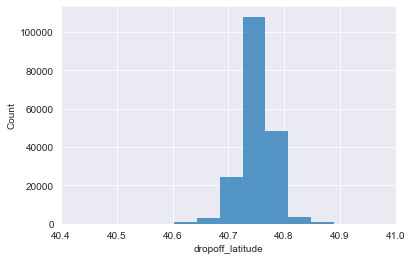

In [192]:
sns.histplot(data=uber_df, x="dropoff_latitude", bins = 1000)
plt.xlim(40.4, 41)

In [193]:
old_shape = uber_df.shape
uber_df.drop(uber_df[(uber_df['dropoff_latitude'] < 40.7) | (uber_df['dropoff_latitude'] > 41)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')

Number of samples before removing outliers: 189540
Number of samples after removing outliers: 183254


(40.4, 41.0)

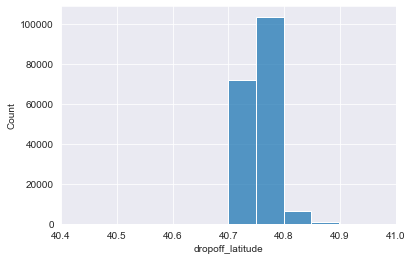

In [194]:
sns.histplot(data=uber_df, x="dropoff_latitude", bins = 6)
plt.xlim(40.4, 41)

### Analyze fare_amount

(-10.0, 100.0)

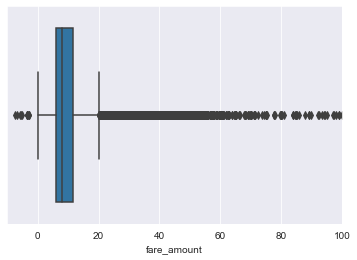

In [195]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['fare_amount'], orient='h')
plt.xlim(-10, 100)

In [196]:
median = np.median(uber_df['fare_amount'])
std = np.std(uber_df['fare_amount'])
mean = np.mean(uber_df['fare_amount'])
Q1 = uber_df['fare_amount'].quantile(0.25)
Q3 = uber_df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 6.0
The third quartile value is 11.7
The interquartile range is 5.699999999999999
The lower thresold is -2.549999999999999
The upper thresold is 20.25


For the fares we remove the values that have fares with a value of 0 or less than that as those are unrealistic. Since we do not have too many values with a large fare and we have already removed the outliers in the coordinates, we will remove fares greater than 70 because they are outliers that will affect the model

In [197]:
old_shape = uber_df.shape
#remove values where fare is less than or equal to zero as they are not realistic
uber_df.drop(uber_df[(uber_df['fare_amount'] <= 0) | (uber_df['fare_amount'] > 70)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')

Number of samples before removing outliers: 183254
Number of samples after removing outliers: 183165


We will now look at the other features that could be treated as either numerical or categorical variables depending on the use of that feature. I plot the feature against the fare_amount to see how the fare_amount differs for every category and I also plot the number of samples for each category

### Analyze Hour

In [198]:
uber_df['hour'].value_counts()

19    11669
18    11239
20    10730
21    10371
22     9880
13     9335
12     9333
14     9041
17     9003
15     8877
11     8845
9      8834
23     8675
8      8523
10     8454
16     7640
0      6885
7      6662
1      5147
2      3855
6      3728
3      2842
4      1994
5      1603
Name: hour, dtype: int64

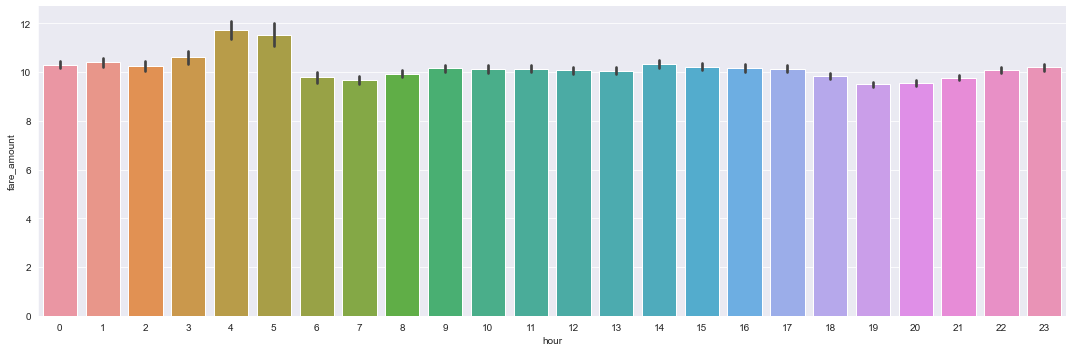

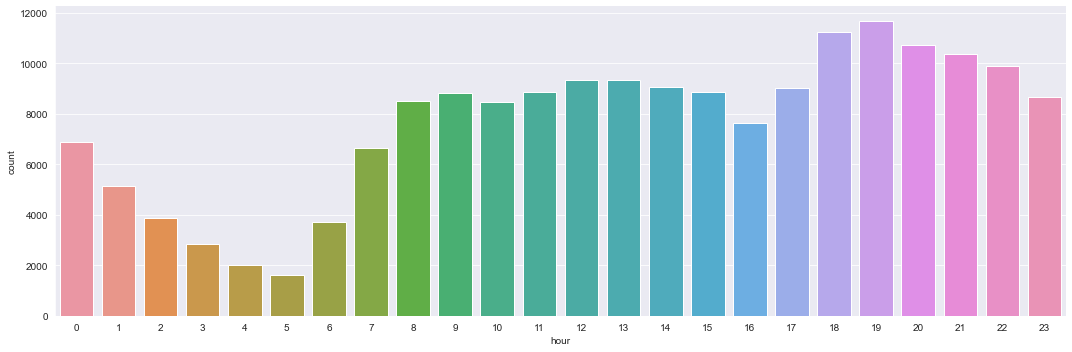

In [199]:
sns.catplot(x="hour", y="fare_amount",  data=uber_df, kind="bar", aspect=3)
sns.catplot(x="hour", kind='count' ,  data=uber_df, aspect=3)
sns.despine()
plt.show()

We can see that the number of cabs recorded to be taken in hours 2-8 are lower than the rest. They also tend to have the highest fare_amount

### Analyze year

In [200]:
#Look at the values of the Year column
uber_df.year.value_counts()

2012    29500
2011    29213
2009    28453
2013    28393
2010    27788
2014    27249
2015    12569
Name: year, dtype: int64

We can see that all the values were measure within the years 2009 to 2015.

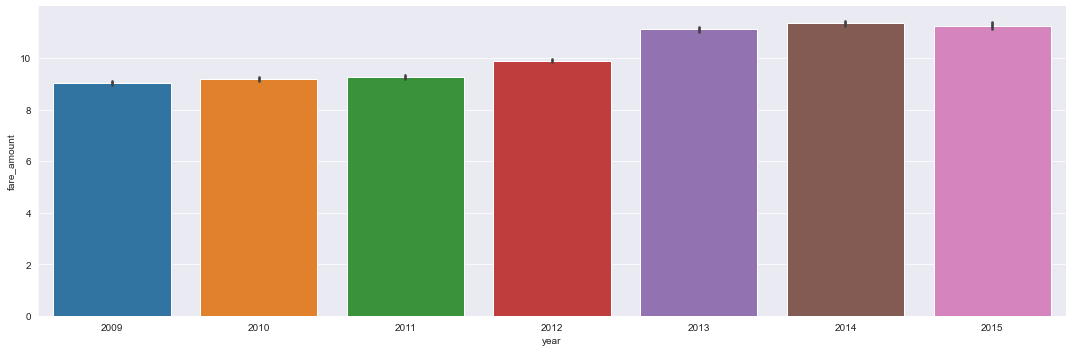

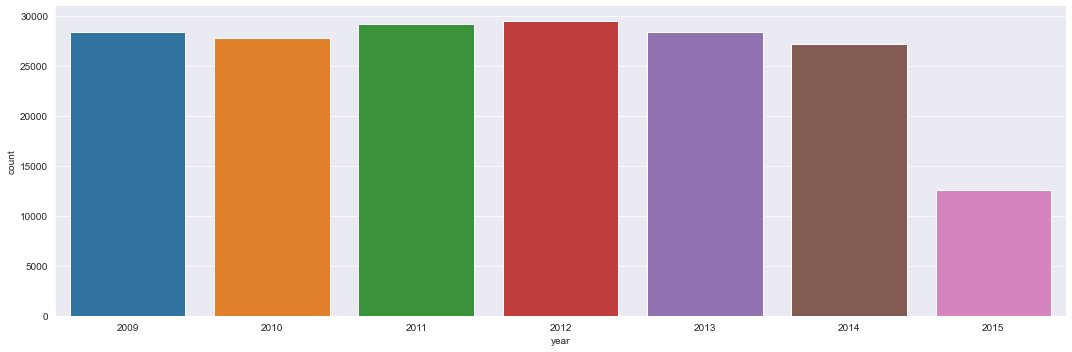

In [201]:
sns.catplot(x="year", y="fare_amount",  data=uber_df, kind="bar", aspect=3)
sns.catplot(x="year", kind='count' ,  data=uber_df, aspect=3)
sns.despine()
plt.show()

In the case of samples with year 2015 having half the number of samples as the other categories, it is possible that there was a change in the data collection process or a reduction in the number of observations during that year. However, if the data from 2015 is still representative of the overall population and there are no major discrepancies in the data collection process, then dropping these samples could result in a loss of valuable information and bias the results of your analysis. So we will still consider that category for the moment

### Analyze day

In [202]:
#Repeat for Day
uber_df.day.value_counts()

4    28360
5    27648
3    27596
2    26692
1    25980
6    23762
0    23127
Name: day, dtype: int64

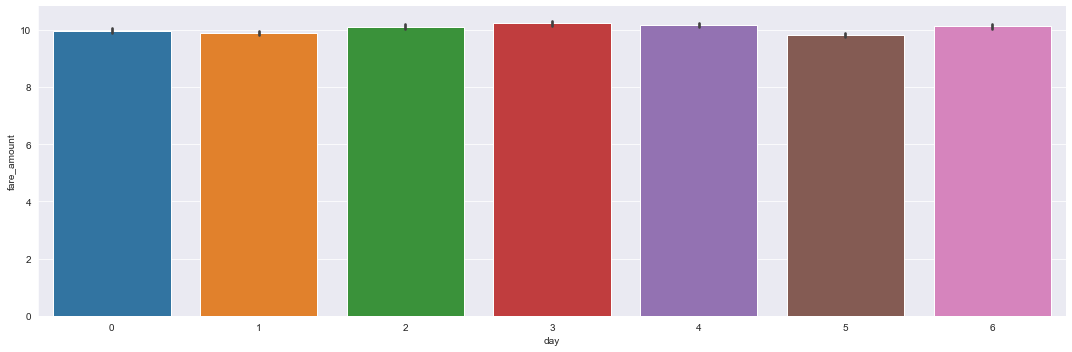

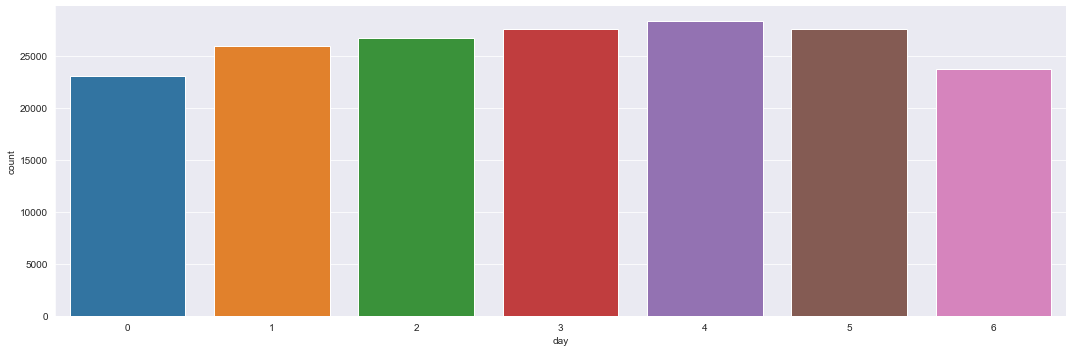

In [203]:
sns.catplot(x="day", y="fare_amount",  data=uber_df, kind="bar", aspect=3)
sns.catplot(x="day", kind='count' ,  data=uber_df, aspect=3)
sns.despine()
plt.show()

There are fewer cab rides recorded on Monday and Sunday, but the fare_amount for each day remains relatively the same

### Analyze Month

In [204]:
#do the same for Month
uber_df['month'].value_counts()

3     17266
5     17085
4     17012
1     16306
6     16279
2     15305
10    14855
12    14284
11    14066
9     13984
7     13801
8     12922
Name: month, dtype: int64

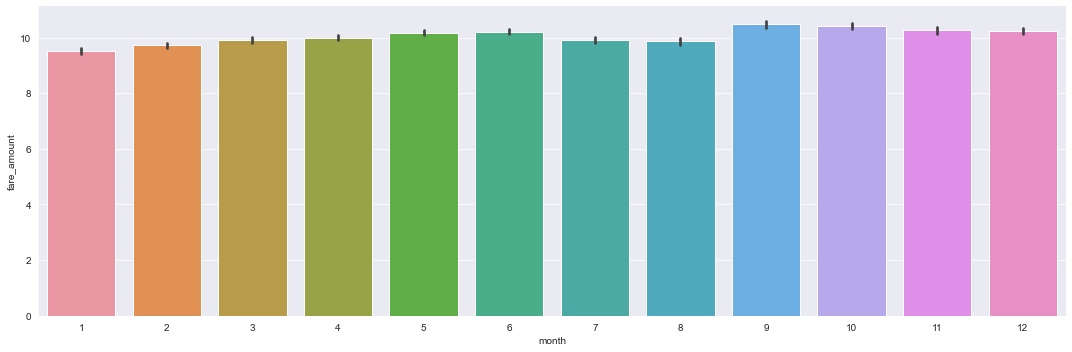

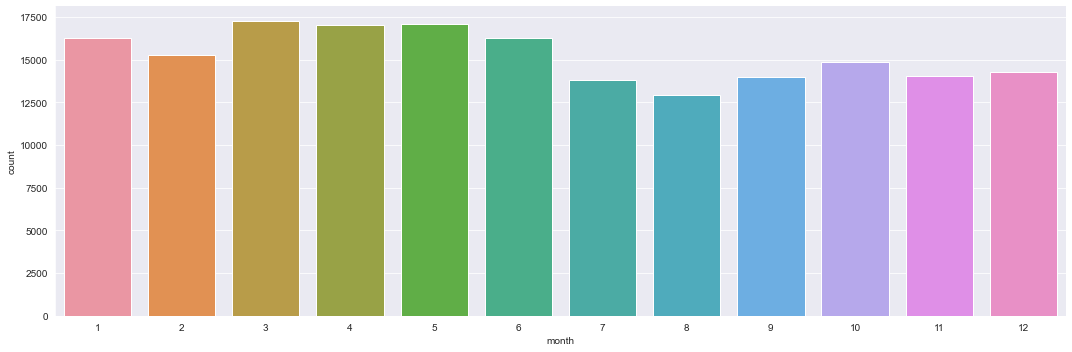

In [205]:
sns.catplot(x="month", y="fare_amount",  data=uber_df, kind="bar", aspect=3)
sns.catplot(x="month", kind='count' ,  data=uber_df, aspect=3)
sns.despine()
plt.show()

### Analyze passenger_count

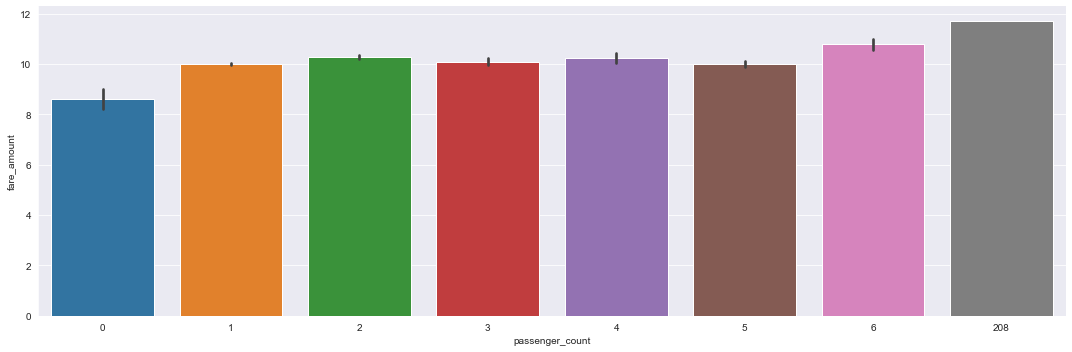

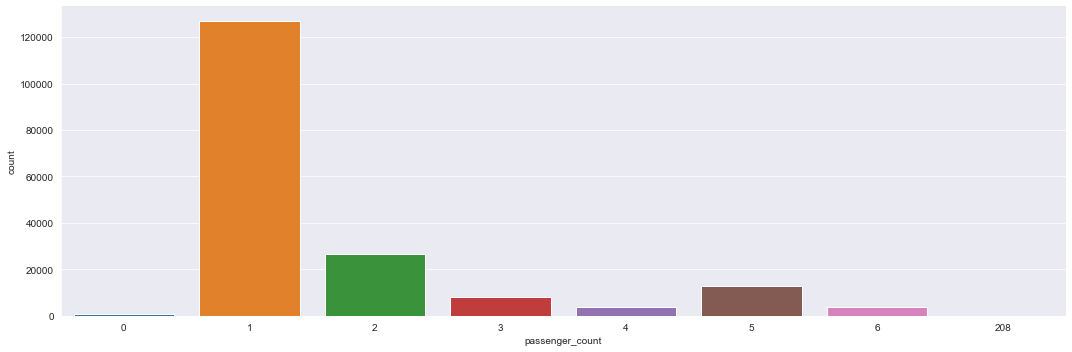

In [206]:
sns.catplot(x="passenger_count", y="fare_amount",  data=uber_df, kind="bar", aspect=3)
sns.catplot(x="passenger_count", kind='count' ,  data=uber_df, aspect=3)
sns.despine()
plt.show()

Since the samples with 208 passengers is unrealistic, we will drop it

In [207]:
#Look at sample with 208 passengers
uber_df[uber_df.passenger_count == 208]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,Distance,abs_long,abs_lat
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,1,8,0.009825,0.00004,0.000083


In [208]:
old_shape = uber_df.shape
uber_df.drop(uber_df[(uber_df['passenger_count'] == 208)].index, inplace=True)
print(old_shape, uber_df.shape)

(183165, 13) (183164, 13)


We will also drop samples with 0 passengers since it is also unrealistic

In [209]:
#drop values with 0 passengers
old_shape = uber_df.shape
uber_df.drop(uber_df[(uber_df['passenger_count'] == 0)].index, inplace=True)
print(old_shape, uber_df.shape)

(183164, 13) (182513, 13)


### Analyze Distance

In [210]:
uber_df['Distance'].describe()

count    182513.000000
mean          2.805708
std           2.439261
min           0.000000
25%           1.221637
50%           2.048007
75%           3.523745
max          32.375424
Name: Distance, dtype: float64

<AxesSubplot:xlabel='Distance'>

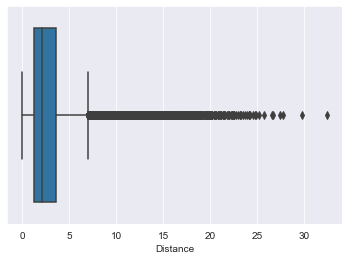

In [211]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=uber_df['Distance'], orient='h')

<AxesSubplot:xlabel='Distance', ylabel='Count'>

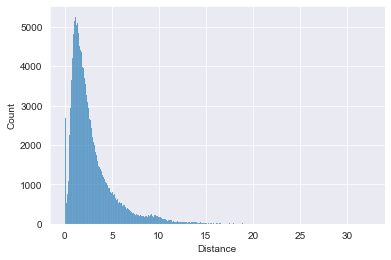

In [212]:
sns.histplot(data=uber_df, x="Distance")

In [213]:
median = np.median(uber_df['Distance'])
std = np.std(uber_df['Distance'])
mean = np.mean(uber_df['Distance'])
Q1 = uber_df['Distance'].quantile(0.25)
Q3 = uber_df['Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - (1.5 * IQR)
upper_thresh = Q3 + (1.5 * IQR)
print(f'The first quartile value is {Q1}')
print(f'The third quartile value is {Q3}')
print(f'The interquartile range is {IQR}')
print(f'The lower thresold is {lower_thresh}')
print(f'The upper thresold is {upper_thresh}')

The first quartile value is 1.2216369120859962
The third quartile value is 3.5237447869781384
The interquartile range is 2.302107874892142
The lower thresold is -2.231524900252217
The upper thresold is 6.976906599316352


Remove the values that have distance of 0 because they are not accurate and will affect our model

In [214]:
old_shape = uber_df.shape
#remove values where fare is less than or equal to zero as they are not realistic
uber_df.drop(uber_df[(uber_df['Distance'] <= 0)].index, inplace=True)
print(f'Number of samples before removing outliers: {old_shape[0]}')
print(f'Number of samples after removing outliers: {uber_df.shape[0]}')

Number of samples before removing outliers: 182513
Number of samples after removing outliers: 180751


<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

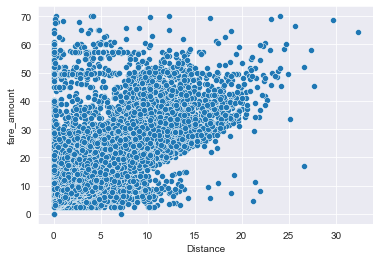

In [215]:
sns.scatterplot(data=uber_df, x="Distance", y="fare_amount")

### Visualize fare_amount

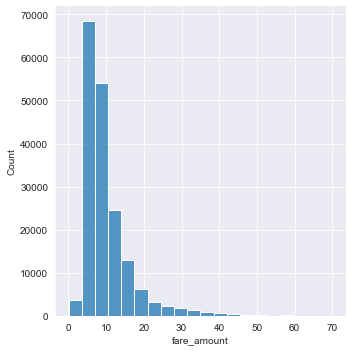

In [216]:
sns.displot(uber_df.fare_amount, bins = 20)

We can see a peak in the fare_amount at around $5-10 and so most of the fares are less than 20

### Drop Variables

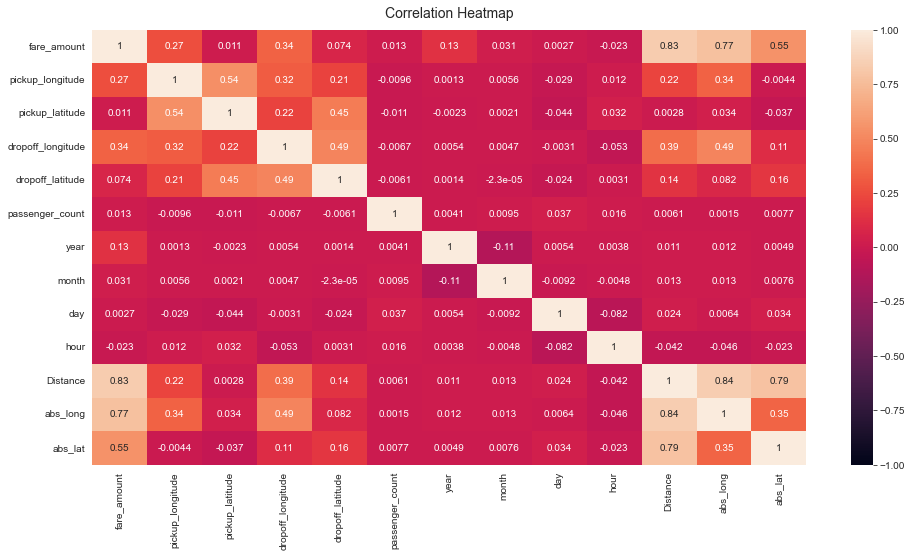

In [217]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(uber_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

From the heatmap we can see that there is multicollinearity between various variables, especially the ones judging the distance. Since I have calculated the distance using the formula, I no longer need the coordinates so we can drop those columns. Even the abs_long and abs_lat columns are correlated and since we don't gain any new information from those columns we can drop those as well

In [218]:
uber_df.drop(columns = ['pickup_longitude', 'pickup_latitude',
                                                'dropoff_longitude', 'dropoff_latitude', 'abs_long',
                                               'abs_lat'], inplace = True)

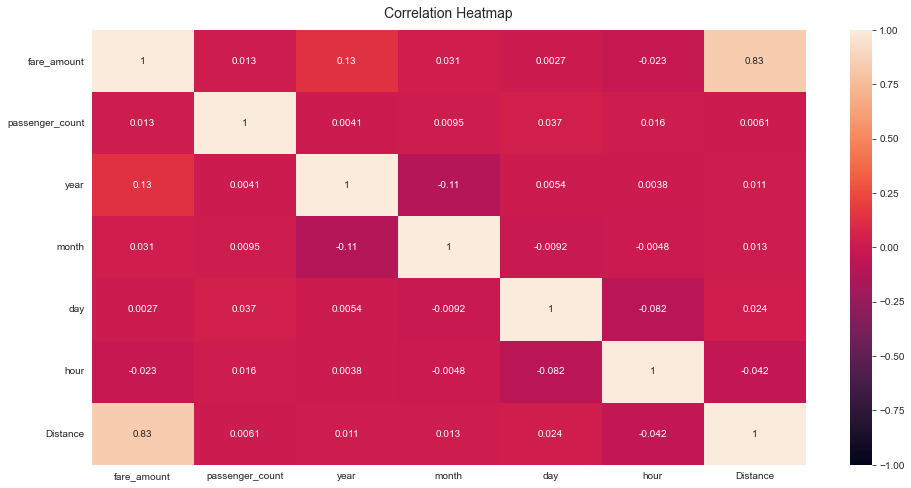

In [219]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(uber_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### New columns exploration

To explore the data further, I tried to group different months together and the hours of the day together as well. A new dataframe with the same data as our origional dataframe is created and I mapped the values of the mont into quarters. I mapped hour values of the day into 6 segments. I then used one-hot-encoding to check if there was any correlation

In [220]:
#create new df
new_df = uber_df.copy(deep=True)

In [221]:
#map months into quarters
new_df['monthly_quarter'] = uber_df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

In [222]:
#map hours into 6 segments
new_df['hourly_segments'] = uber_df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [223]:
new_df.head()

,fare_amount,passenger_count,year,month,day,hour,Distance,monthly_quarter,hourly_segments
0,7.5,1,2015,5,3,19,1.683323,Q2,H5
1,7.7,1,2009,7,4,20,2.457590,Q3,H6
2,12.9,1,2009,8,0,21,5.036377,Q3,H6
3,5.3,3,2009,6,4,8,1.661683,Q2,H3
4,16.0,5,2014,8,3,17,4.475450,Q3,H5


In [232]:
new_df.drop(columns = ['hour', 'month'], inplace=True)

In [225]:
from sklearn.preprocessing import OneHotEncoder

In [226]:
#conduct one hot encoding on day column
onehotencoder = OneHotEncoder(sparse=False)

l = onehotencoder.fit_transform(new_df[['day']])

encoded_data = pd.DataFrame(l, index=new_df.index, columns = ['isMon', 'isTues', 'isWed', 'isThur', 'isFri',
                                                              'isSat', 'isSun'])
new_df = pd.concat([new_df, encoded_data], axis=1)

In [227]:
#conduct one hot encoding on monthly_quarter column
onehotencoder = OneHotEncoder(sparse=False)
l = onehotencoder.fit_transform(new_df[['monthly_quarter']])

encoded_data = pd.DataFrame(l, index=new_df.index, columns = ['Q1', 'Q2', 'Q3', 'Q4'])
new_df = pd.concat([new_df, encoded_data], axis=1)

In [228]:
#conduct one hot encoding on hourly_segments column
onehotencoder = OneHotEncoder(sparse=False)
l = onehotencoder.fit_transform(new_df[['hourly_segments']])

encoded_data = pd.DataFrame(l, index=new_df.index, columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6'])
new_df = pd.concat([new_df, encoded_data], axis=1)

Now that we have encoded the data from the day, hourly_segments, monthly_quarters, we can drop those columns

In [230]:
new_df.drop(columns=['day', 'hourly_segments', 'monthly_quarter'], inplace=True)

In [233]:
new_df

,fare_amount,passenger_count,year,Distance,isMon,isTues,isWed,isThur,isFri,isSat,...,Q1,Q2,Q3,Q4,H1,H2,H3,H4,H5,H6
0,7.5,1,2015,1.683323,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7.7,1,2009,2.457590,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.9,1,2009,5.036377,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.3,3,2009,1.661683,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,16.0,5,2014,4.475450,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,9.5,1,2012,2.640893,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
199994,12.0,1,2014,1.122878,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
199995,3.0,1,2012,0.112210,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
199996,7.5,1,2014,1.875050,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Test and Train Data

I'm going to split my data into train and test data for my models. I will be using a test_size of 0.2 as the default. The reason for choosing 20% of samples as test data is to provide a large enough sample size to evaluate the performance of your machine learning model, while still reserving a significant amount of data for training. The 20% ratio is a widely used and widely accepted standard, as it provides a reasonable balance between having enough data to train the model and having enough data to evaluate its performance. In addition, 20% of the data is often considered to be a sufficient sample size to evaluate the model's performance, as long as the data is representative of the underlying distribution.

From the exploration above, I will take the values that are more correlated to fare_amount than other columns. 

In [234]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(new_df.drop(columns = ['fare_amount']).values)
y = new_df['fare_amount'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Model

I will now train different models with their baseline parameters and evaluate them using metrics

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [244]:
reg = LinearRegression()

print('Fitting the model...')
reg.fit(X_train, y_train)

print('Predicting the model...')
y_pred = reg.predict(X_test)

Fitting the model...
Predicting the model...


In [245]:
print('Model Evaluation')
print('\nCalculating MSE....')
mse_reg = mean_squared_error(y_test, y_pred,)
print(mse_reg)

print('\nCalculating R^2....')
r2_reg = reg.score(X_test, y_test)
print(r2_reg)

print('\nCalculating MAE....')
mae_reg = mean_absolute_error(y_test, y_pred)
print(mae_reg)

Model Evaluation

Calculating MSE....
12.431387555268733

Calculating R^2....
0.7252616156991065

Calculating MAE....
1.9886596247580672


In [246]:
from sklearn.ensemble import RandomForestRegressor

In [247]:
rnd_reg = RandomForestRegressor()

print('Fitting the model...')
rnd_reg.fit(X_train, y_train)

print('Predicting the model...')
y_pred_rnd = rnd_reg.predict(X_test)

Fitting the model...
Predicting the model...


In [248]:
print('Model Evaluation')
print('\nCalculating MSE....')
mse_rnd = mean_squared_error(y_test, y_pred_rnd)
print(mse_rnd)

print('\nCalculating R^2....')
r2_rnd = rnd_reg.score(X_test, y_test)
print(r2_rnd)

print('\nCalculating MAE....')
mae_rnd = mean_absolute_error(y_test, y_pred_rnd)
print(mae_rnd)

Model Evaluation

Calculating MSE....
11.752690583093107

Calculating R^2....
0.7402610764380175

Calculating MAE....
1.976162493430334


In [249]:
from sklearn.ensemble import GradientBoostingRegressor

In [250]:
gbr = GradientBoostingRegressor()

print('Fitting the model...')
gbr.fit(X_train, y_train)

print('Predicting the model...')
y_pred_gbr = gbr.predict(X_test)

Fitting the model...
Predicting the model...


In [252]:
print('Model Evaluation')
print('\nCalculating MSE....')
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(mse_gbr)

print('\nCalculating R^2....')
r2_gbr = gbr.score(X_test, y_test)
print(r2_gbr)

print('\nCalculating MAE....')
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(mae_gbr)

Model Evaluation

Calculating MSE....
10.753648987564095

Calculating R^2....
0.762340274965514

Calculating MAE....
1.8368721888325856


### Hyperameter Tuning

Tuning the hyperparameters of a machine learning model is important because it can have a significant impact on the performance of the model. Hyperparameters are parameters that are not learned from the data, but are set prior to training the model. They control aspects of the model such as the number of trees in a Random Forest or the learning rate in Gradient Boosting.

I will be using RandomizedSearchCV for tuning the hyperparameters of machine learning algorithms. The main reason for using RandomizedSearchCV for these algorithms is that it is a more efficient and faster way to perform hyperparameter tuning compared to traditional grid search methods.

I have also implemented the grid search method but due to the number of samples it is too costly to run. In grid search, you exhaustively search the hyperparameter space by trying every combination of hyperparameters.

In contrast, randomized search randomly samples the hyperparameter space and only tries a specified number of random combinations. This reduces the number of trials required and can often result in a more efficient search.

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [255]:
param_grid = {'max_depth': [10, None],
              'max_features': ['auto', 'log2'], 'n_estimators': [50, 100, 250], 'bootstrap' : [True]}

In [260]:
rnd_reg_gs = RandomForestRegressor(random_state=42)

#For girdsearch
# rnd_reg_model = GridSearchCV(estimator=rnd_reg_gs, param_grid=param_grid,
#                             verbose=10, n_jobs=1)
rnd_reg_model = RandomizedSearchCV(estimator=rnd_reg_gs, param_distributions=param_grid,
                            verbose=10, n_iter=10)

rnd_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=10, max_features=log2, n_estimators=250
[CV 1/5; 1/10] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=250;, score=0.706 total time=   8.4s
[CV 2/5; 1/10] START bootstrap=True, max_depth=10, max_features=log2, n_estimators=250
[CV 2/5; 1/10] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=250;, score=0.699 total time=   8.3s
[CV 3/5; 1/10] START bootstrap=True, max_depth=10, max_features=log2, n_estimators=250
[CV 3/5; 1/10] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=250;, score=0.703 total time=   8.4s
[CV 4/5; 1/10] START bootstrap=True, max_depth=10, max_features=log2, n_estimators=250
[CV 4/5; 1/10] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=250;, score=0.695 total time=   8.7s
[CV 5/5; 1/10] START bootstrap=True, max_depth=10, max_features=log2, n_estimators=250
[CV 5/5; 1/10] END bootstrap=Tru

[CV 5/5; 8/10] END bootstrap=True, max_depth=None, max_features=log2, n_estimators=100;, score=0.699 total time=   9.3s
[CV 1/5; 9/10] START bootstrap=True, max_depth=None, max_features=auto, n_estimators=50
[CV 1/5; 9/10] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50;, score=0.727 total time=  14.9s
[CV 2/5; 9/10] START bootstrap=True, max_depth=None, max_features=auto, n_estimators=50
[CV 2/5; 9/10] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50;, score=0.724 total time=  14.5s
[CV 3/5; 9/10] START bootstrap=True, max_depth=None, max_features=auto, n_estimators=50
[CV 3/5; 9/10] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50;, score=0.727 total time=  14.4s
[CV 4/5; 9/10] START bootstrap=True, max_depth=None, max_features=auto, n_estimators=50
[CV 4/5; 9/10] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50;, score=0.719 total time=  14.6s
[CV 5/5; 9/10] START bootstrap=True, max_depth=None,

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [50, 100, 250]},
                   verbose=10)

In [269]:
best_grid = rnd_reg_model.best_params_
best_grid

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [270]:
print('Model Evaluation')
y_pred_rnd_rs = rnd_reg_model.predict(X_test)
print('\nCalculating MSE....')
mse_rnd_rs = mean_squared_error(y_test, y_pred_rnd_rs)
print(mse_rnd_rs)

print('\nCalculating R^2....')
r2_rnd_rs = rnd_reg_model.score(X_test, y_test)
print(r2_rnd_rs)

print('\nCalculating MAE....')
mae_rnd_rs = mean_absolute_error(y_test, y_pred_rnd_rs)
print(mae_rnd_rs)

Model Evaluation

Calculating MSE....
10.742865218889769

Calculating R^2....
0.7625786003470603

Calculating MAE....
1.8410981355173242


We will repeat the same process for the gradient boosting model

In [265]:
parameters = {'learning_rate': [0.1,0.03, 0.05],
                  'subsample'    : [1],
                  'n_estimators' : [100,300],
                  'max_depth'    : [3, 6]
                 }

In [267]:
gbr_rs = GradientBoostingRegressor()

gbr_reg_model = RandomizedSearchCV(estimator=gbr_rs, param_distributions=parameters,
                            verbose=10, n_iter=10)

gbr_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1
[CV 1/5; 1/10] END learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1;, score=0.757 total time=  21.6s
[CV 2/5; 1/10] START learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1
[CV 2/5; 1/10] END learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1;, score=0.749 total time=  21.7s
[CV 3/5; 1/10] START learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1
[CV 3/5; 1/10] END learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1;, score=0.755 total time=  21.1s
[CV 4/5; 1/10] START learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1
[CV 4/5; 1/10] END learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1;, score=0.746 total time=  21.3s
[CV 5/5; 1/10] START learning_rate=0.03, max_depth=3, n_estimators=300, subsample=1
[CV 5/5; 1/10] END learning_rate=0.03, max_depth=3, n_estim

[CV 2/5; 9/10] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.744 total time=   7.1s
[CV 3/5; 9/10] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1
[CV 3/5; 9/10] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.750 total time=   7.3s
[CV 4/5; 9/10] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1
[CV 4/5; 9/10] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.741 total time=   7.0s
[CV 5/5; 9/10] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1
[CV 5/5; 9/10] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.747 total time=   7.1s
[CV 1/5; 10/10] START learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1
[CV 1/5; 10/10] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1;, score=0.758 total time=  21.0s
[CV 2/5; 10/10] START learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1
[CV 2

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.03, 0.05],
                                        'max_depth': [3, 6],
                                        'n_estimators': [100, 300],
                                        'subsample': [1]},
                   verbose=10)

In [271]:
best_grid = gbr_reg_model.best_params_
best_grid

{'subsample': 1, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05}

In [ ]:
print('Model Evaluation')
y_pred_gbr_rs = gbr_reg_model.predict(X_test)
print('\nCalculating MSE....')
mse_gbr_rs = mean_squared_error(y_test, y_pred_gbr_rs)
print(mse_gbr_rs)

print('\nCalculating R^2....')
r2_gbr_rs = gbr_reg_model.score(X_test, y_test)
print(r2_gbr_rs)

print('\nCalculating MAE....')
mae_gbr_rs = mean_absolute_error(y_test, y_pred_gbr_rs)
print(mae_gbr_rs)

# Error Analysis

In [275]:
#Find the largest values that differed from the expected value
mse = (y_pred_rnd_rs - y_test) ** 2
mse

array([7.11224565, 1.4525535 , 0.04914599, ..., 1.09823104, 2.99474283,
       0.32188498])

In [276]:
ind = np.argpartition(mse, -5)[-5:]

In [277]:
ind

array([  427, 19564, 27165, 13243, 19290])

In [282]:
X_test[ind]

array([[-0.52759699,  0.67848293, -0.75941692, -0.37953176,  2.45997889,
        -0.41324721, -0.42134421, -0.42789687, -0.42187207, -0.38621874,
         1.65794341, -0.61627891, -0.53424967, -0.55570092, -0.33754775,
         3.4779305 , -0.48314924, -0.49954007, -0.52458013, -0.5258147 ],
       [ 2.53550916, -0.93099699, -0.21027948,  2.63482561, -0.40650755,
        -0.41324721, -0.42134421, -0.42789687, -0.42187207, -0.38621874,
        -0.6031569 , -0.61627891,  1.87178402, -0.55570092, -0.33754775,
         3.4779305 , -0.48314924, -0.49954007, -0.52458013, -0.5258147 ],
       [-0.52759699,  0.67848293, -1.0229245 , -0.37953176, -0.40650755,
        -0.41324721,  2.37335644, -0.42789687, -0.42187207, -0.38621874,
        -0.6031569 , -0.61627891,  1.87178402, -0.55570092, -0.33754775,
        -0.28752731, -0.48314924, -0.49954007, -0.52458013,  1.90181066],
       [-0.52759699,  0.14198963, -0.93016754, -0.37953176, -0.40650755,
        -0.41324721,  2.37335644, -0.42789687, -

In [296]:
error_df = pd.DataFrame(scale.inverse_transform([[-0.52759699,  0.67848293, -0.75941692, -0.37953176,  2.45997889,
        -0.41324721, -0.42134421, -0.42789687, -0.42187207, -0.38621874,
         1.65794341, -0.61627891, -0.53424967, -0.55570092, -0.33754775,
         3.4779305 , -0.48314924, -0.49954007, -0.52458013, -0.5258147 ],
       [ 2.53550916, -0.93099699, -0.21027948,  2.63482561, -0.40650755,
        -0.41324721, -0.42134421, -0.42789687, -0.42187207, -0.38621874,
        -0.6031569 , -0.61627891,  1.87178402, -0.55570092, -0.33754775,
         3.4779305 , -0.48314924, -0.49954007, -0.52458013, -0.5258147 ],
       [-0.52759699,  0.67848293, -1.0229245 , -0.37953176, -0.40650755,
        -0.41324721,  2.37335644, -0.42789687, -0.42187207, -0.38621874,
        -0.6031569 , -0.61627891,  1.87178402, -0.55570092, -0.33754775,
        -0.28752731, -0.48314924, -0.49954007, -0.52458013,  1.90181066],
       [-0.52759699,  0.14198963, -0.93016754, -0.37953176, -0.40650755,
        -0.41324721,  2.37335644, -0.42789687, -0.42187207, -0.38621874,
         1.65794341, -0.61627891, -0.53424967, -0.55570092, -0.33754775,
        -0.28752731, -0.48314924, -0.49954007, -0.52458013,  1.90181066],
       [-0.52759699,  1.75146955, -1.01749555, -0.37953176, -0.40650755,
        -0.41324721, -0.42134421, -0.42789687, -0.42187207,  2.58920633,
         1.65794341, -0.61627891, -0.53424967, -0.55570092,  2.96254383,
        -0.28752731, -0.48314924, -0.49954007, -0.52458013, -0.5258147 ]]), columns=['passenger_count', 'year', 'Distance', 'isMon', 'isTues',
       'isWed', 'isThur', 'isFri', 'isSat', 'isSun', 'Q1', 'Q2', 'Q3', 'Q4',
       'H1', 'H2', 'H3', 'H4', 'H5', 'H6'])

In [297]:
error_df.round(0)

,passenger_count,year,Distance,isMon,isTues,isWed,isThur,isFri,isSat,isSun,Q1,Q2,Q3,Q4,H1,H2,H3,H4,H5,H6
0,1.0,2013.0,1.0,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0
1,5.0,2010.0,2.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0
2,1.0,2013.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0
3,1.0,2012.0,1.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0
4,1.0,2015.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,1.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0
